# Session 2 - Multi-Armed Bandits - Assignment

In this assignment you will apply different multi-armed bandit algorithms in order to discover the bandit with highest reward.
We'll start with deterministic bandits, meaning that the bandit rewards are not subject to any underlying stochastic process.
Next we'll focuss on stochastic bandits where the reward of a bandit is the result of a stochastic process and therefore making the discovery of the best bandit much harder. 
Finally we will applay the MAB strategies to solve practical real-life problems.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Deterministic bandits
Assume you have to play 5 bandits with fixed rewards. These rewards are hidden and unknown when you start playing. 
You can play the bandits 100 times. Find out how you can maximize your total reward over these 100 trials.

Use the BanditEnv_1 environment for this experiment.

In [2]:
##### Deterministic Bandit Environment

class BanditEnv_1:
    def __init__(self):
        self.rewards = [-10,6,8,0,-2]
        
    def reset(self):
        self.rewards = [-10,6,8,0,-2]
        
    def step(self,action):
        self.action = action
        return self.rewards[self.action]

In [3]:
# Create an Env1 object
Env1 = BanditEnv_1()
Env1.reset()

In [4]:
# Taken an action. For example choose bandit 0
reward = Env1.step(0)
print('reward =', reward)

reward = -10


If you know in advance that the bandits have fixed rewards, the best strategy will be to play them all once and then pick the one with the highest reward (greedy action).

[-10, 6, 8, 0, -2]
Bandit with the highest reward is bandit 2 with a reward of 8
The total reward =  808.3348731761587


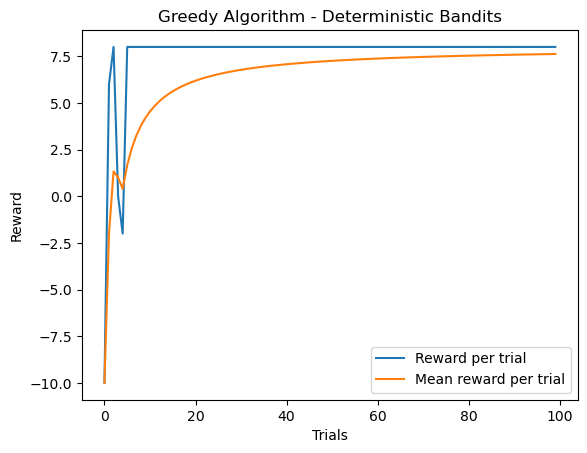

In [21]:
rewards = []
meanRewards = []
totalReward = 0
for action in range(5):
    rewards.append(Env1.step(action))
    meanRewards.append(np.mean(rewards))
    totalReward = totalReward + reward
    
print(rewards)
bestAction = np.argmax(rewards)
print('Bandit with the highest reward is bandit',bestAction, 'with a reward of',rewards[bestAction])

for i in range(100 - 5):
    rewards.append(Env1.step(bestAction))
    meanRewards.append(np.mean(rewards))
    totalReward = totalReward + Env1.step(bestAction)

print('The total reward = ', totalReward)

# Plot the rewards as a funtion of the number of trials
plt.plot(rewards)
plt.plot(meanRewards)
plt.title('Greedy Algorithm - Deterministic Bandits')
plt.xlabel('Trials')
plt.ylabel('Reward')
plt.legend(['Reward per trial','Mean reward per trial'])

##### 2. Stochastic bandits

In the case of stochastic bandits, the reward is sampled from an initially unknown distribution. Our task is to discover the expected reward of each of the bandits as quickly (and reliably) as possible. 
As an example, assume that the reward of a bandit comes from a normal distribution with mean = 10 and standard deviation of 5. This means that in 68% procent of the trials this bandit will return a reward between 10-5 = 5 and 10+5 = 15. If you play this bandit multiple times, you can expect that the average reward will converge to 10.

Use BanditEnv_2 for this exercise. All 5 bandits have rewards coming from normal distributions with different means, but with the same standard deviation (std = 1).
You can play this bandit 200 times. Try to come up with a good strategy to maximize the total reward over these 200 trials.

In [6]:
class BanditEnv_2:
    def __init__(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1
        
    def reset(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1

    def step(self,action):
        self.action = action
        return np.random.normal(self.means[self.action], self.std, 1)[0]

In [7]:
# Create an Env2 object
Env2 = BanditEnv_2()
Env2.reset()
print(Env2.means)

[-10, 6, 8, 0, -2]


### 2.1 Epsilon Greedy

1. Implement the epsilon greedy algorithm to play the Env2 bandits. 
2. Show the influence of epsilon parameter. Do this by plotting the reward history for different values of epsilon. Also visualize how often a bandit was chosen.
3. Find the optimal epsilon value giving you maximum total reward.
4. Use epsilon decay. This means that you gradually decrease the value of epsilon as the number of trials increases. Use the following rule: $\epsilon(t+1) = \eta \times \epsilon(t) $ where $0< \eta < 1$
5. Now test for different values of the standard deviation. What if the standard deviation becomes larger?

epsilon =  0.0 total reward =  756.7586072980058
epsilon =  0.1 total reward =  694.6263151344493
epsilon =  0.2 total reward =  686.5673177753931
epsilon =  0.4 total reward =  448.28577659571255
epsilon =  0.6 total reward =  363.0713246336357
epsilon =  0.8 total reward =  171.46860481291014
epsilon =  1.0 total reward =  65.83642402871904


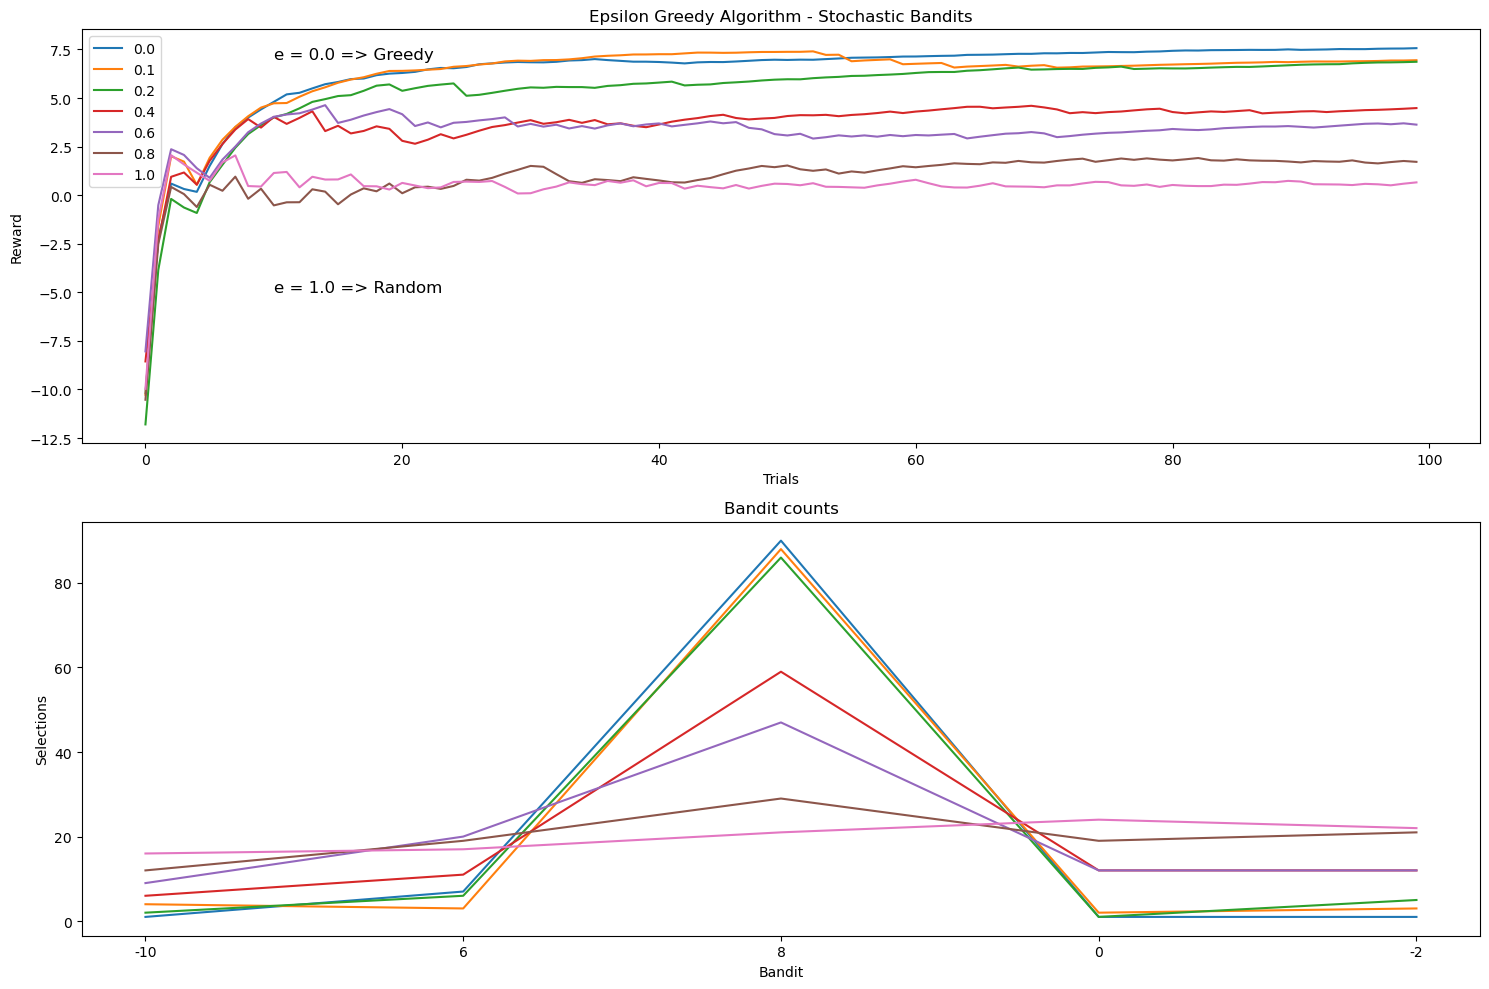

In [39]:
# epsilon greedy
iterations = 100
epsilon = [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
Banditcount = len(Env2.means)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 10))

for e in epsilon:
    Bandits = np.zeros(Banditcount)
    means = np.zeros(Banditcount)
    rewards = []
    meanRewards = []
    totalReward = 0

    # Play the first 5 actions to set the initial estimated means
    for action in range(Banditcount):
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        means[action] = reward
        Bandits[action] = Bandits[action] + 1
        totalReward = totalReward + reward

    for _ in range(iterations-Banditcount):
        if np.random.random() < e:
            action = np.random.randint(Banditcount)
        else:
            action = np.argmax(means)
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = reward
        totalReward = totalReward + reward
    print('epsilon = ', e, 'total reward = ', totalReward)
    
    ax1.plot(meanRewards)
    ax2.plot(Bandits)
ax1.set_title('Epsilon Greedy Algorithm - Stochastic Bandits')
ax1.set_xlabel('Trials')
ax1.set_ylabel('Reward')
ax1.legend(epsilon)
ax1.text(10, 7, 'e = 0.0 => Greedy', fontsize=12)
ax1.text(10, -5, 'e = 1.0 => Random', fontsize=12)
ax2.set_title('Bandit counts')
ax2.set_xlabel('Bandit')
ax2.set_xticks(range(Banditcount))
ax2.set_xticklabels(Env2.means)
ax2.set_ylabel('Selections')
plt.tight_layout()
plt.show()


epsilon =  4.4981962247603756e-05 total reward =  714.0123628609629


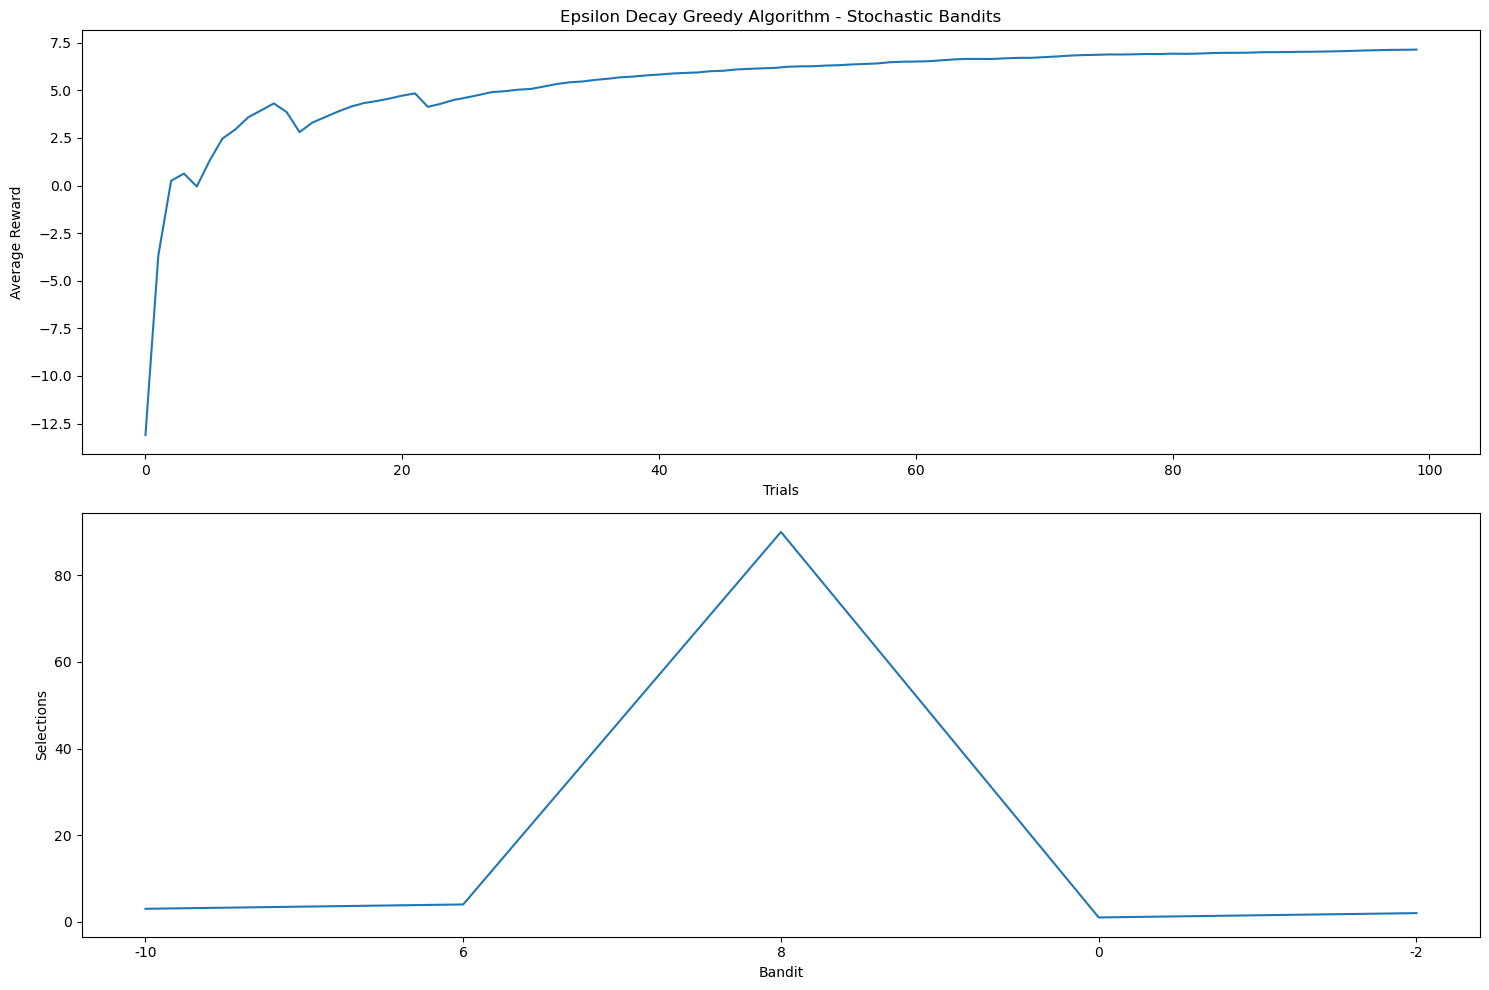

In [44]:
# Epsilon decay
iterations = 100
e = 1.0
decay = 0.9
Banditcount = len(Env2.means)


Bandits = np.zeros(Banditcount)
means = np.zeros(Banditcount)
rewards = []
meanRewards = []
totalReward = 0

# Play the first 5 actions to set the initial estimated means
for action in range(Banditcount):
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    means[action] = reward
    Bandits[action] = Bandits[action] + 1
    totalReward = totalReward + reward

for _ in range(iterations-Banditcount):
    if np.random.random() < e:
        action = np.random.randint(Banditcount)
    else:
        action = np.argmax(means)
    e = e * decay
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    means[action] = reward
    totalReward = totalReward + reward
print('epsilon = ', e, 'total reward = ', totalReward)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 10))
ax1.plot(meanRewards)
ax2.plot(Bandits)
ax1.set_title('Epsilon Decay Greedy Algorithm - Stochastic Bandits')
ax1.set_xlabel('Trials')
ax1.set_ylabel('Average Reward')
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Selections')
ax2.set_xticks(range(Banditcount))
ax2.set_xticklabels(Env2.means)
plt.tight_layout()
plt.show()


In [46]:
# Influence of standard deviation
class BanditEnv_2:
    def __init__(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1
        
    def reset(self,std=1):
        self.means = [-10,6,8,0,-2]
        self.std = std

    def step(self,action):
        self.action = action
        return np.random.normal(self.means[self.action], self.std, 1)[0]

# Create an Env2 object
Env2 = BanditEnv_2()
Env2.reset()
print(Env2.means)
print(Env2.std)

[-10, 6, 8, 0, -2]
1


epsilon =  0.1 std =  0.0 total reward =  720.0
epsilon =  0.1 std =  0.1 total reward =  694.2273923427057
epsilon =  0.1 std =  0.5 total reward =  681.775435335299
epsilon =  0.1 std =  1.0 total reward =  722.8618790139009
epsilon =  0.1 std =  2.0 total reward =  688.5151922056358
epsilon =  0.1 std =  5.0 total reward =  499.434699336264
epsilon =  0.1 std =  10.0 total reward =  706.4743532201162


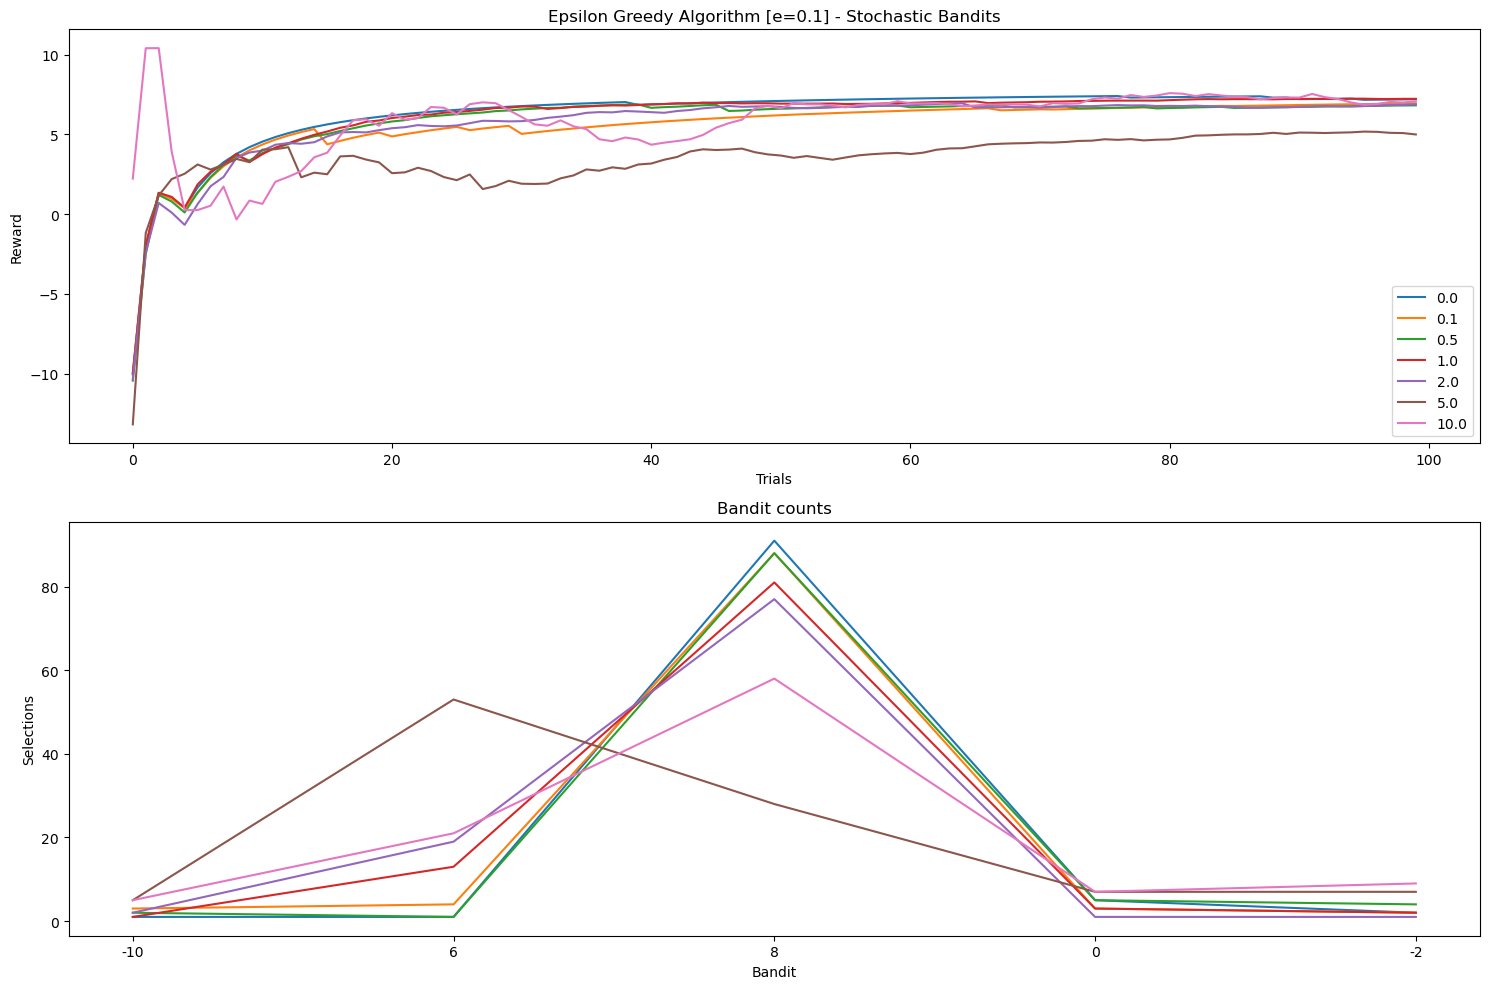

In [49]:
iterations = 100
e = 0.1
stdevs = [0.0, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
Banditcount = len(Env2.means)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 10))

for s in stdevs:
    Env2.reset(s)
    Bandits = np.zeros(Banditcount)
    means = np.zeros(Banditcount)
    rewards = []
    meanRewards = []
    totalReward = 0

    # Play the first 5 actions to set the initial estimated means
    for action in range(Banditcount):
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        means[action] = reward
        Bandits[action] = Bandits[action] + 1
        totalReward = totalReward + reward

    for _ in range(iterations-Banditcount):
        if np.random.random() < e:
            action = np.random.randint(Banditcount)
        else:
            action = np.argmax(means)
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = reward
        totalReward = totalReward + reward
    print('epsilon = ', e, 'std = ', s,'total reward = ', totalReward)
    
    ax1.plot(meanRewards)
    ax2.plot(Bandits)
ax1.set_title('Epsilon Greedy Algorithm [e=0.1] - Stochastic Bandits')
ax1.set_xlabel('Trials')
ax1.set_ylabel('Reward')
ax1.legend(stdevs)
ax2.set_title('Bandit counts')
ax2.set_xlabel('Bandit')
ax2.set_xticks(range(Banditcount))
ax2.set_xticklabels(Env2.means)
ax2.set_ylabel('Selections')
plt.tight_layout()
plt.show()

A larger standard deviation means that the reward distribution is more spread out. The differences between the bandits become smaller and the distributions start to overlap more. 
Therefore it becomes harder to find the best bandit and results in a lower total reward.

### 2.2 Optimistic Initial Value

Continue to work with the Env2 environment. 
Implement the Optimistic Initial Value algorithm. Start by initializing the estimated bandit means to a high non-zero value and use a greedy approach. 
After each play the estimated bandit mean will come closer to the true bandit mean.

1. Implement the optimistic initial value algorithm to play the Env2 bandits. Check the final values of the estimated means.
2. Show the initialization. What happens if you initialize the estimated means to larger values? 
3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?
4. Compare the optimistic initial value approach to the epsilon greedy approach. Plot the reward history of both in one graph.



In [11]:
# Create an Env2 object
Env2 = BanditEnv_2()
Env2.reset()
print(Env2.means)

[-10, 6, 8, 0, -2]


True means =  [-10, 6, 8, 0, -2]
---------------------------------------------------------------
Optimistic Initail Values =  [10, 10, 10, 10, 10]
total reward =  5947.24865815751
Bandits =  [  2. 989.   2.   6.   6.]
Estimated means =  [-4.129726028471222, 6.050033195694554, 0.46928773469671725, 0.826053403133459, 2.6883972973897925]
Errors =  [5.87027397 0.0500332  7.53071227 0.8260534  4.6883973 ]
Total Absolute Error =  18.965470133049866
Mean Absolute Error =  3.7930940266099733
Mean Squared Error =  22.76753609745385
Root Mean Squared Error =  4.771533935481739
---------------------------------------------------------------
Optimistic Initail Values =  [50, 50, 50, 50, 50]
total reward =  8021.703866991017
Bandits =  [  7.   6. 983.   6.   3.]
Estimated means =  [5.26297991073991, 7.719569358248491, 8.285709097847057, 3.7900402515602902, 6.984435591100436]
Errors =  [15.26297991  1.71956936  0.2857091   3.79004025  8.98443559]
Total Absolute Error =  30.04273420949618
Mean Absolu

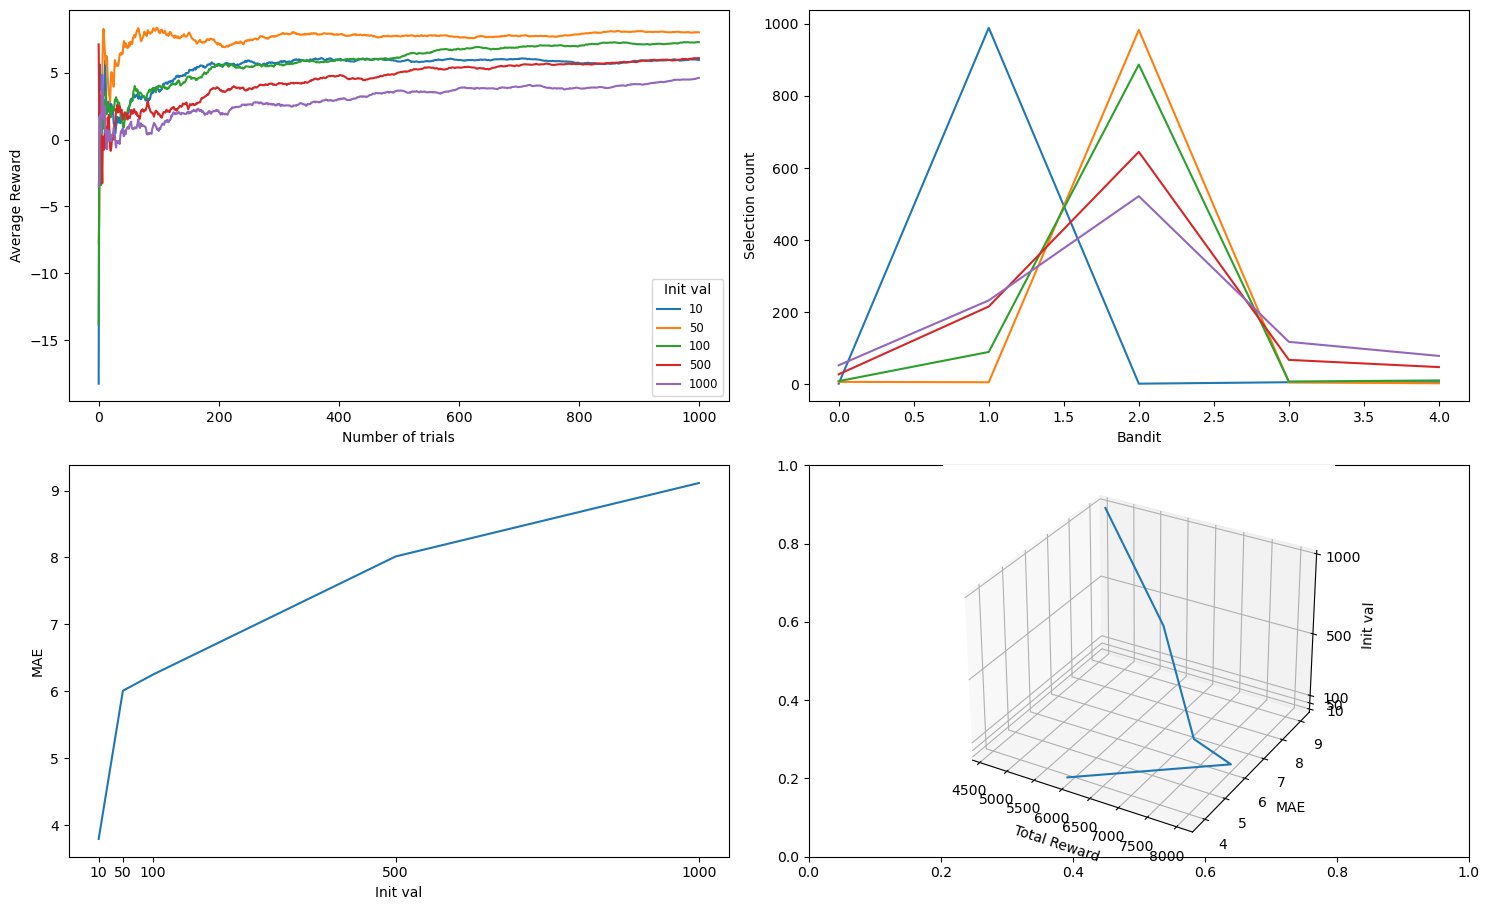

In [65]:
# Optimistic initial value - Different Initial Values
# Hidden means are [-10,6,8,0,-2]
iterations = 1000
OptimisticInitialValues = [10, 50, 100, 500, 1000]
stdevs = [0.1, 1, 2, 5, 10]
Banditcount = len(Env2.means)
total_errors = []
totalRewards = []


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
print('True means = ', Env2.means)

print('---------------------------------------------------------------')
for OptimisticInitialValue in OptimisticInitialValues:
    Bandits = np.ones(Banditcount)
    means = [OptimisticInitialValue for i in range(Banditcount)]
    rewards = []
    meanRewards = []
    totalReward = 0
    print('Optimistic Initail Values = ', means)

    for _ in range(iterations):
        action = np.argmax(means)
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = means[action] + ((reward - means[action]) / Bandits[action])
        totalReward = totalReward + reward
    totalRewards.append(totalReward)
    print('total reward = ', totalReward)
    print('Bandits = ', Bandits)
    print('Estimated means = ', means)
    error = np.abs(np.array(Env2.means) - np.array(means))
    total_error = np.sum(error)
    total_errors.append(total_error / len(error))
    print('Errors = ', error)
    print('Total Absolute Error = ', total_error)
    print('Mean Absolute Error = ', total_error / len(error))
    print('Mean Squared Error = ', np.sum(error**2) / len(error))
    print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
    print('---------------------------------------------------------------')

    ax[0,0].plot(meanRewards, label=OptimisticInitialValue)
    ax[0,1].plot(Bandits)
ax[1,0].plot(OptimisticInitialValues, total_errors)
ax[1,0].set_xticks(OptimisticInitialValues)


ax[1,1] = fig.add_subplot(2,2,4, projection='3d')
ax[1,1].plot(totalRewards,total_errors,OptimisticInitialValues)

ax[0,0].set_xlabel('Number of trials')
ax[0,0].set_ylabel('Average Reward')
ax[0,0].legend(OptimisticInitialValues, title='Init val', loc='lower right', fontsize='small')
ax[0,1].set_xlabel('Bandit')
ax[0,1].set_ylabel('Selection count')

ax[1,0].set_xlabel('Init val')
ax[1,0].set_ylabel('MAE')

ax[1,1].set_xlabel('Total Reward')
ax[1,1].set_ylabel('MAE')
ax[1,1].set_zticks(OptimisticInitialValues)
ax[1,1].set_zlabel('Init val')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




The estimated means are not close to the true means. Only the highest mean is close to the true mean. This is because the bandit with the bighest mean is played more often and therefore the estimated mean will converge faster to the true mean. All other estimated means will converge to a value further away. To show this I calculated the overall error made by the estimated means. (In real life examples the error cannot be calculated since the true means will always be unknown.)

The higher the initial value, the more iterations it will take to converge to the true mean.
Higher initial values will result in more exploration and therefore a lower total reward.

True means =  [-10, 6, 8, 0, -2]
Optimistic Initail Values =  [1000, 1000, 1000, 1000, 1000]
---------------------------------------------------------------
Standard deviation =  0.1
total reward =  4965.059170906511
Bandits =  [ 51. 253. 516. 101.  84.]
Estimated means =  [9.80767295969952, 9.919772854138065, 9.92423153741594, 9.904831219359542, 9.927070135749588]
Errors =  [19.80767296  3.91977285  1.92423154  9.90483122 11.92707014]
Total Absolute Error =  47.48357870636266
Mean Absolute Error =  9.496715741272531
Mean Squared Error =  130.3543755646249
Root Mean Squared Error =  11.417284071294052
---------------------------------------------------------------
Standard deviation =  1
total reward =  4950.865326436813
Bandits =  [ 51. 251. 518. 100.  85.]
Estimated means =  [9.706057804081345, 9.924591119592371, 9.923382349651629, 9.888872404715423, 9.830408350822259]
Errors =  [19.7060578   3.92459112  1.92338235  9.8888724  11.83040835]
Total Absolute Error =  47.27331202886303
Me

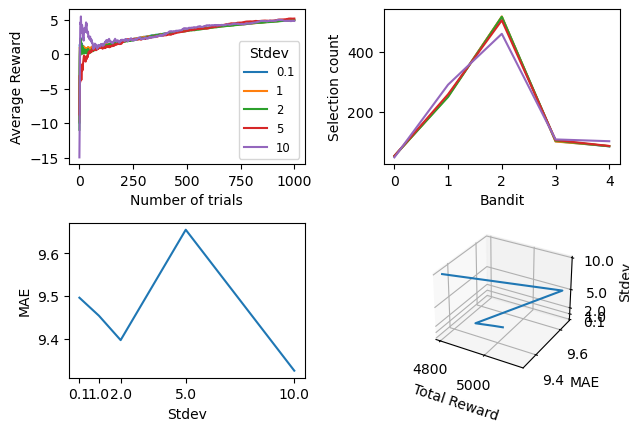

In [ ]:
# Optimistic initial value - Different Standard Deviations
# Hidden means are [-10,6,8,0,-2]
iterations = 1000
OptimisticInitialValue = 1000
stdevs = [0.1, 1, 2, 5, 10]
Banditcount = len(Env2.means)
means = [OptimisticInitialValue for i in range(Banditcount)]
total_errors = []
totalRewards = []

fig = plt.figure()

print('True means = ', Env2.means)
print('Optimistic Initail Values = ', means)
print('---------------------------------------------------------------')
for stdev in stdevs:
    Env2.reset(stdev)
    Bandits = np.ones(Banditcount)
    means = [OptimisticInitialValue for i in range(Banditcount)]
    rewards = []
    meanRewards = []
    totalReward = 0
    print('Standard deviation = ', stdev)

    for _ in range(iterations):
        action = np.argmax(means)
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = means[action] + ((reward - means[action]) / Bandits[action])
        totalReward = totalReward + reward
    totalRewards.append(totalReward)
    print('total reward = ', totalReward)
    print('Bandits = ', Bandits)
    print('Estimated means = ', means)
    error = np.abs(np.array(Env2.means) - np.array(means))
    total_error = np.sum(error)
    total_errors.append(total_error / len(error))
    print('Errors = ', error)
    print('Total Absolute Error = ', total_error)
    print('Mean Absolute Error = ', total_error / len(error))
    print('Mean Squared Error = ', np.sum(error**2) / len(error))
    print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
    print('---------------------------------------------------------------')

    ax1 = plt.subplot(2,2,1)
    plt.plot(meanRewards, label=stdev)
    ax2 = plt.subplot(2,2,2)
    plt.plot(Bandits)
ax3 = fig.add_subplot(2,2,3)
ax3.set_xticks(stdevs)
# ax3.set_xticklabels(stdevs)
plt.plot(stdevs,total_errors)

ax4 = fig.add_subplot(2,2,4, projection='3d')
plt.plot(totalRewards,total_errors,stdevs)

ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(stdevs, title='Stdev', loc='lower right', fontsize='small')
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Selection count')

ax3.set_xlabel('Stdev')
ax3.set_ylabel('MAE')

ax4.set_xlabel('Total Reward')
ax4.set_ylabel('MAE')
ax4.set_zticks(stdevs)
ax4.set_zlabel('Stdev')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




The influence of the standard deviation is small when using low values. Higher values will again result in more exploration and therefore a lower total reward.

Epsilon Greedy
Epsilon =  0.1 total reward =  7214.474605320237
---------------------------------------------------------------
Optimistic Initial Value
True means =  [-10, 6, 8, 0, -2]
Optimistic Initail Values =  [50, 50, 50, 50, 50]
total reward =  7823.13700411237
Bandits played =  [  4.  20. 968.   7.   6.]
Estimated means =  [5.167066600912511, 7.9618667036832305, 8.062369029096978, 6.933376784591404, 6.720757662838973]
Errors =  [15.1670666   1.9618667   0.06236903  6.93337678  8.72075766]
Total Absolute Error =  32.8454367811231
Mean Absolute Error =  6.569087356224619
Mean Squared Error =  71.6032095972806
Root Mean Squared Error =  8.461867973283475
---------------------------------------------------------------


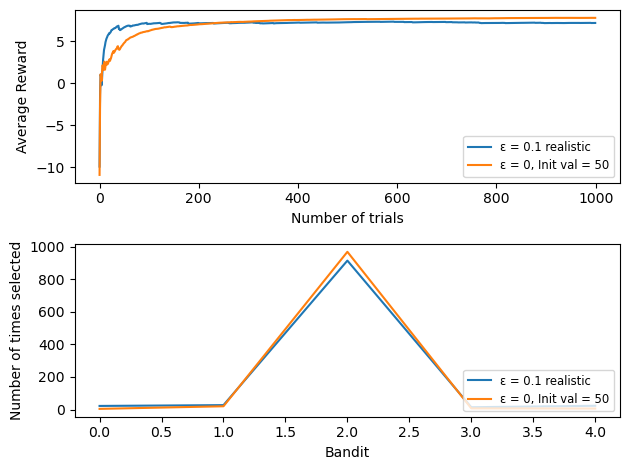

In [14]:
# epsilon greedy vs optimistic initial value
# epsilon greedy
print('Epsilon Greedy')
iterations = 1000
epsilon = 0.1
Banditcount = len(Env2.means)

Bandits = np.zeros(Banditcount)
means = np.zeros(Banditcount)
rewards = []
meanRewards = []
totalReward = 0

# Play the first 5 actions to set the initial estimated means
for action in range(Banditcount):
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    means[action] = reward
    Bandits[action] = Bandits[action] + 1
    totalReward = totalReward + reward
# Play the rest of the actions
for _ in range(iterations-Banditcount):
    if np.random.random() < epsilon:
        action = np.random.randint(Banditcount)
    else:
        action = np.argmax(means)
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    means[action] = means[action] + ((reward - means[action]) / Bandits[action])
    totalReward = totalReward + reward
print('Epsilon = ', epsilon, 'total reward = ', totalReward)
ax1 = plt.subplot(2,1,1)
plt.plot(meanRewards)
ax2 = plt.subplot(2,1,2)
plt.plot(Bandits)
print('---------------------------------------------------------------')

# Optimistic initial value
# Hidden means are [-10,6,8,0,-2]
print('Optimistic Initial Value')
OptimisticInitialValue = 50
means = [OptimisticInitialValue for i in range(Banditcount)]
Bandits = np.ones(Banditcount)
rewards = []
meanRewards = []
totalReward = 0

print('True means = ', Env2.means)
print('Optimistic Initail Values = ', means)

for _ in range(iterations):
    action = np.argmax(means)
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    means[action] = means[action] + ((reward - means[action]) / Bandits[action])
    totalReward = totalReward + reward

print('total reward = ', totalReward)
print('Bandits played = ', Bandits)
print('Estimated means = ', means)
error = np.abs(np.array(Env2.means) - np.array(means))
total_error = np.sum(error)

print('Errors = ', error)
print('Total Absolute Error = ', total_error)
print('Mean Absolute Error = ', total_error / len(error))
print('Mean Squared Error = ', np.sum(error**2) / len(error))
print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
print('---------------------------------------------------------------')

ax1 = plt.subplot(2,1,1)
plt.plot(meanRewards)
ax2 = plt.subplot(2,1,2)
plt.plot(Bandits)
# Plot modifications
ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(['\u03B5 = 0.1 realistic','\u03B5 = 0, Init val = 50'], loc='lower right', fontsize='small')
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Number of times selected')
ax2.legend(['\u03B5 = 0.1 realistic','\u03B5 = 0, Init val = 50'], loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()

The difference between the two methods is hard to compare. The biggest difference is the measure of exploration done.
If you take an epsilon value of 0.1 and an initial value of 50 you get a good comparison. Higher values of epsilon will result in situations much worse than the optimistic initial value method with a value of 50.
On the other hand will higher initial values result in much worse outcomes than the epsilon method with a value of 0.1.
The main takeaway is that too much exploration will result in a lower total reward. This could be accomplished by using a high initial value or a high epsilon value.

### 2.3 Upper Confidence Bound

Continue to work with the Env2 environment and implement the Upper Confidence Bound algorithm. 
Select the action based on the following rule:

$A_t = argmax_a \left( MeanRewards + c  \sqrt{\frac{\ln{t}}{N_a(t)}}  \right)$

1. Implement the upper confidence bound algorithm to play the Env2 bandits. Check the final values of the estimated means.
2. Change the parameter c? Explain the influence of c. 
3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?
4. Compare the upper confidence bound approach to the epsilon greedy approach and opimistic initial value. Plot the reward histories of the algorithms in one graph.


True means =  [-10, 6, 8, 0, -2]
---------------------------------------------------------------
Confidence =  0.1
total reward =  1755.7034008387977
Bandits =  [  1.   1. 192.   1.   5.]
Estimated means =  [-23.583167978163722, -2.4792099640782546, 9.343357602537068, -22.11152074061948, 1.9905279669083336]
Errors =  [13.58316798  8.47920996  1.3433576  22.11152074  3.99052797]
Total Absolute Error =  49.507784252306855
Mean Absolute Error =  9.901556850461372
Mean Squared Error =  152.60954530075068
Root Mean Squared Error =  12.353523598583147
---------------------------------------------------------------
Confidence =  0.5
total reward =  1417.0582184410066
Bandits =  [  1.   1. 196.   1.   1.]
Estimated means =  [-11.789310826534104, 2.824762633181614, 7.3716845409927405, -12.193521855552188, -6.63388154466544]
Errors =  [ 1.78931083  3.17523737  0.62831546 12.19352186  4.63388154]
Total Absolute Error =  22.42026705257738
Mean Absolute Error =  4.484053410515476
Mean Squared Error

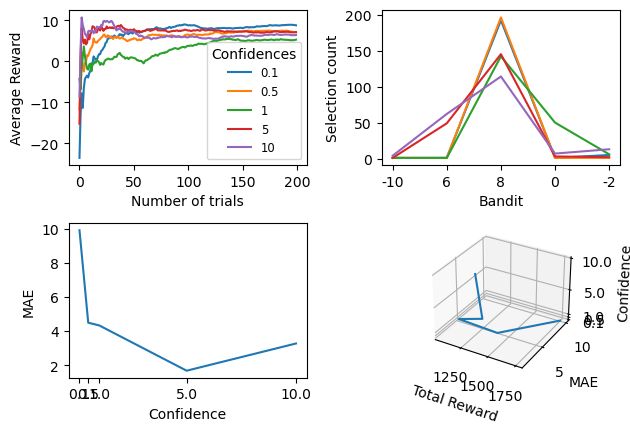

In [71]:
# Upper Confidence Bound
# Hidden means are [-10,6,8,0,-2]
iterations = 200
stdevs = 1
confidences = [0.1, 0.5, 1, 5, 10]
Banditcount = len(Env2.means)
bounds = [0 for i in range(Banditcount)]
total_errors = []
totalRewards = []

fig = plt.figure()

print('True means = ', Env2.means)

print('---------------------------------------------------------------')
for c in confidences:
    print('Confidence = ', c)
    Bandits = np.zeros(Banditcount)
    means = [0 for i in range(Banditcount)]
    rewards = []
    meanRewards = []
    totalReward = 0
    
    # Play the first 5 actions to set the initial estimated means otherwise we will divide by zero (bandit count)
    for action in range(Banditcount):
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        means[action] = reward
        Bandits[action] = Bandits[action] + 1
        totalReward = totalReward + reward

    for _ in range(iterations-Banditcount):
        action = np.argmax(means+c*np.sqrt(np.log(np.sum(Bandits))/Bandits))
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = means[action] + ((reward - means[action]) / Bandits[action])
        totalReward = totalReward + reward
    totalRewards.append(totalReward)
    print('total reward = ', totalReward)
    print('Bandits = ', Bandits)
    print('Estimated means = ', means)
    error = np.abs(np.array(Env2.means) - np.array(means))
    total_error = np.sum(error)
    total_errors.append(total_error / len(error))
    print('Errors = ', error)
    print('Total Absolute Error = ', total_error)
    print('Mean Absolute Error = ', total_error / len(error))
    print('Mean Squared Error = ', np.sum(error**2) / len(error))
    print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
    print('---------------------------------------------------------------')

    ax1 = plt.subplot(2,2,1)
    plt.plot(meanRewards, label=c)
    ax2 = plt.subplot(2,2,2)
    plt.plot(Bandits)
ax3 = fig.add_subplot(2,2,3)
ax3.set_xticks(confidences)
plt.plot(confidences,total_errors)

ax4 = fig.add_subplot(2,2,4, projection='3d')
plt.plot(totalRewards,total_errors,confidences)

ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(confidences, title='Confidences', loc='lower right', fontsize='small')

ax2.set_xlabel('Bandit')
ax2.set_xticks(range(Banditcount)) 
ax2.set_xticklabels(Env2.means)
ax2.set_ylabel('Selection count')

ax3.set_xlabel('Confidence')
ax3.set_ylabel('MAE')

ax4.set_xlabel('Total Reward')
ax4.set_ylabel('MAE')
ax4.set_zticks(confidences)
ax4.set_zlabel('Confidence')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Epsilon Greedy
Epsilon =  0.1 total reward =  1310.060257780627
---------------------------------------------------------------
Optimistic Initial Value
True means =  [-10, 6, 8, 0, -2]
Optimistic Initail Values =  [50, 50, 50, 50, 50]
total reward =  1055.2728517486523
Bandits played =  [  7.  36. 134.  17.  11.]
Estimated means =  [1.06032748887713, 6.0385927758280316, 6.9585264400686295, 5.974589261032218, 4.2227871809053745]
Total Absolute Error =  24.337770266574122
Mean Absolute Error =  4.867554053314825
Mean Squared Error =  39.56715957529501
Root Mean Squared Error =  6.290243204781116
---------------------------------------------------------------
Upper Confidence Bound
True means =  [-10, 6, 8, 0, -2]
Confidence c = 2
total reward =  911.1625327636016
Bandits =  [  1. 183.  13.   2.   1.]
Estimated means =  [-1.5223674011559396, 4.7592123652754434, 3.6177138300536247, -2.784177862670959, 0.28711325399558607]
Total Absolute Error =  19.171997520181538
Mean Absolute Error =  3

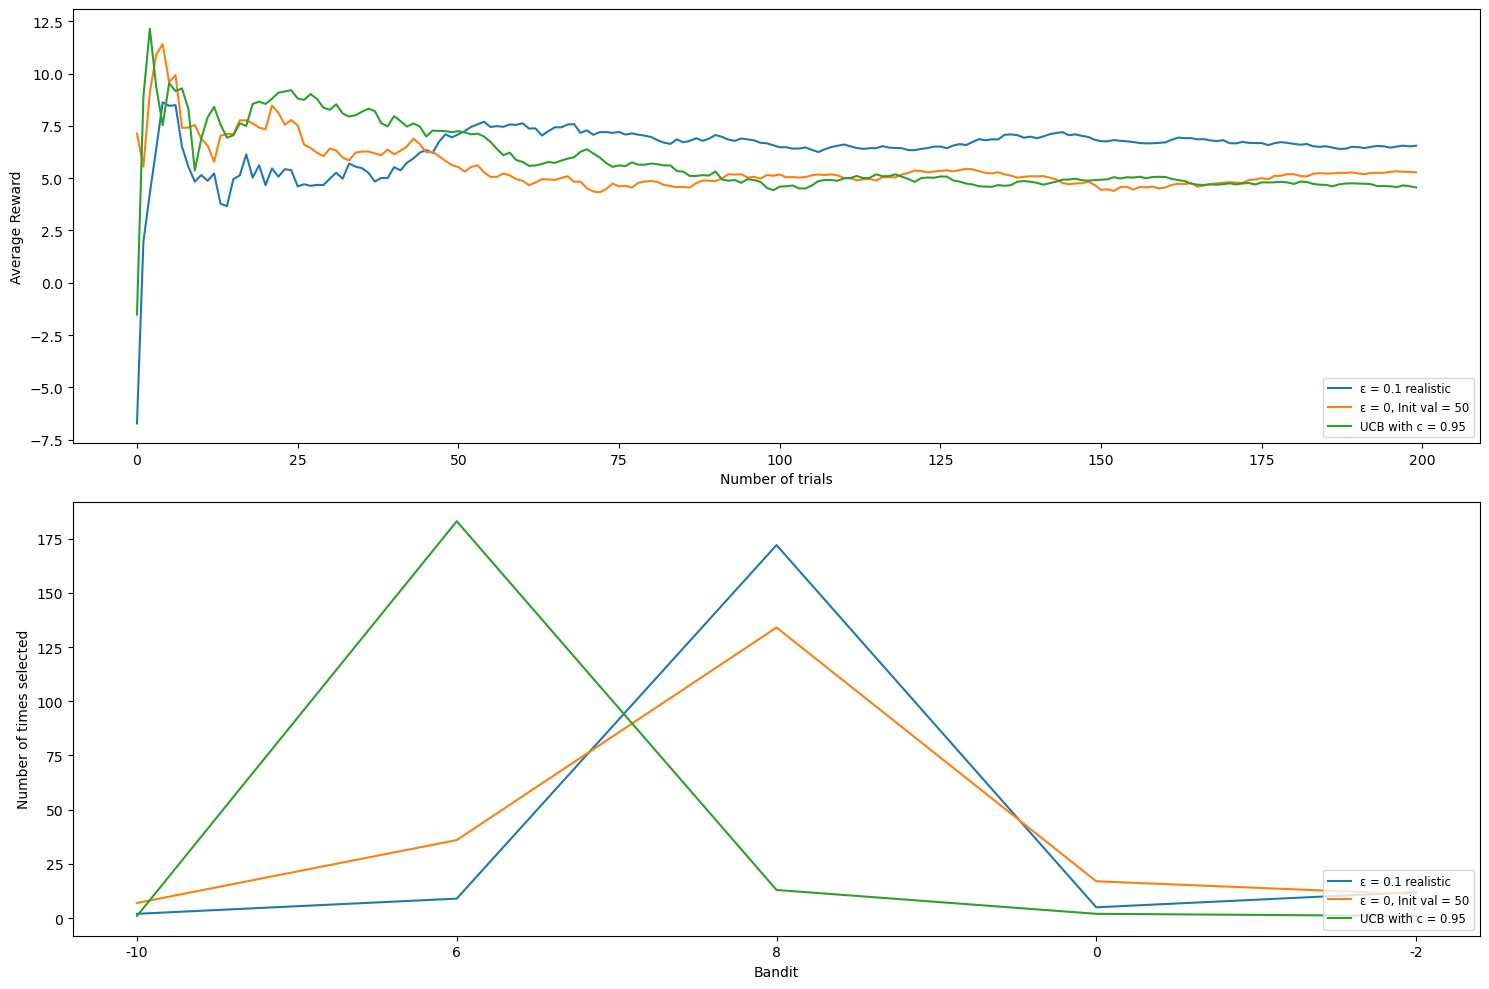

In [74]:
# epsilon greedy vs optimistic initial value vs UCB
iterations = 200
Banditcount = len(Env2.means)

# epsilon greedy
print('Epsilon Greedy')
epsilon = 0.1

Bandits = np.zeros(Banditcount)
means = np.zeros(Banditcount)
rewards = []
meanRewards = []
totalReward = 0

fig, ax = plt.subplots(nrows=2, figsize=(15, 10))
ax1, ax2 = ax.flatten()

# Play the first 5 actions to set the initial estimated means
for action in range(Banditcount):
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    means[action] = reward
    Bandits[action] = Bandits[action] + 1
    totalReward = totalReward + reward
# Play the rest of the actions
for _ in range(iterations-Banditcount):
    if np.random.random() < epsilon:
        action = np.random.randint(Banditcount)
    else:
        action = np.argmax(means)
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    means[action] = means[action] + ((reward - means[action]) / Bandits[action])
    totalReward = totalReward + reward
print('Epsilon = ', epsilon, 'total reward = ', totalReward)

# Add to plot
ax1.plot(meanRewards)
ax2.plot(Bandits)
print('---------------------------------------------------------------')

# Optimistic initial value
# Hidden means are [-10,6,8,0,-2]
print('Optimistic Initial Value')
OptimisticInitialValue = 50
means = [OptimisticInitialValue for i in range(Banditcount)]

Bandits = np.ones(Banditcount)
rewards = []
meanRewards = []
totalReward = 0

print('True means = ', Env2.means)
print('Optimistic Initail Values = ', means)

for _ in range(iterations):
    action = np.argmax(means)
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    means[action] = means[action] + ((reward - means[action]) / Bandits[action])
    totalReward = totalReward + reward

# Add to plot
ax1.plot(meanRewards)
ax2.plot(Bandits)

print('total reward = ', totalReward)
print('Bandits played = ', Bandits)
print('Estimated means = ', means)
error = np.abs(np.array(Env2.means) - np.array(means))
total_error = np.sum(error)

print('Total Absolute Error = ', total_error)
print('Mean Absolute Error = ', total_error / len(error))
print('Mean Squared Error = ', np.sum(error**2) / len(error))
print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))

print('---------------------------------------------------------------')

# Upper Confidence Bound
print('Upper Confidence Bound')
print('True means = ', Env2.means)
print('Confidence c = 2')
c = 2

Bandits = np.zeros(Banditcount)
means = [0 for i in range(Banditcount)]
rewards = []
meanRewards = []
totalReward = 0

# Play the first 5 actions to set the initial estimated means otherwise we will divide by zero (bandit count)
for action in range(Banditcount):
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    means[action] = reward
    Bandits[action] = Bandits[action] + 1
    totalReward = totalReward + reward

for _ in range(iterations-Banditcount):
    action = np.argmax(means+c*np.sqrt(np.log(np.sum(Bandits))/Bandits))
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    means[action] = means[action] + ((reward - means[action]) / Bandits[action])
    totalReward = totalReward + reward
totalRewards.append(totalReward)

# Add to plot
ax1.plot(meanRewards)
ax2.plot(Bandits)

print('total reward = ', totalReward)
print('Bandits = ', Bandits)
print('Estimated means = ', means)
error = np.abs(np.array(Env2.means) - np.array(means))
total_error = np.sum(error)

print('Total Absolute Error = ', total_error)
print('Mean Absolute Error = ', total_error / len(error))
print('Mean Squared Error = ', np.sum(error**2) / len(error))
print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
print('---------------------------------------------------------------')


# Plot modifications
ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(['\u03B5 = 0.1 realistic','\u03B5 = 0, Init val = 50', 'UCB with c = 0.95'], loc='lower right', fontsize='small')
ax2.set_xlabel('Bandit')
ax2.set_xticks(range(Banditcount)) 
ax2.set_xticklabels(Env2.means)
ax2.set_ylabel('Number of times selected')
ax2.legend(['\u03B5 = 0.1 realistic','\u03B5 = 0, Init val = 50', 'UCB with c = 0.95'], loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()

### EXTRA: non-stationary bandits

In the following you have to deal with non-stationary bandits. This means that the expected reward is not stationary and will change over time. 
in the BanditEnv_3, the initial expected rewards will change with a constant after each action.

Figure out the best strategy to optimize the total reward after 200 actions.

In [75]:
class BanditEnv_3:
    def __init__(self):
        self.means = np.array([[-10,6,8,0,-2]])
        self.std = 1
    def reset(self):
        self.means = np.array([[-10,6,8,0,-2]])
        
    def step(self,action):
        self.action = action
        self.means = self.means + np.array([[0.15,-0.1,-0.15,0.05,0.1]])
        return np.random.normal(self.means[0,self.action], self.std, 1)[0]

Epsilon Greedy
Epsilon =  0.1 total reward =  1476.0972099559751
---------------------------------------------------------------
Optimistic Initial Value
True means =  [[-10   6   8   0  -2]]
Optimistic Initail Values =  [50, 50, 50, 50, 50]
total reward =  1492.9721931793795
Bandits played =  [ 18.  19.  19.  22. 127.]
Estimated means =  [8.573760337177868, 7.706131904919101, 7.180784009158866, 8.40143277675645, 17.34356306482888]
Total Absolute Error =  64.56815973531471
Mean Absolute Error =  64.56815973531471
Mean Squared Error =  1456.2195971122608
Root Mean Squared Error =  38.160445452225275
---------------------------------------------------------------
Upper Confidence Bound
True means =  [[-10   6   8   0  -2]]
Confidence c = 2
total reward =  1730.4872720183846
Bandits =  [  1.  21.  33.   2. 143.]
Estimated means =  [-11.079878059172048, 1.8785676147807646, 1.7957556116057904, -0.18437613150615031, 17.048517241650508]
Total Absolute Error =  81.89006017541418
Mean Absolute 

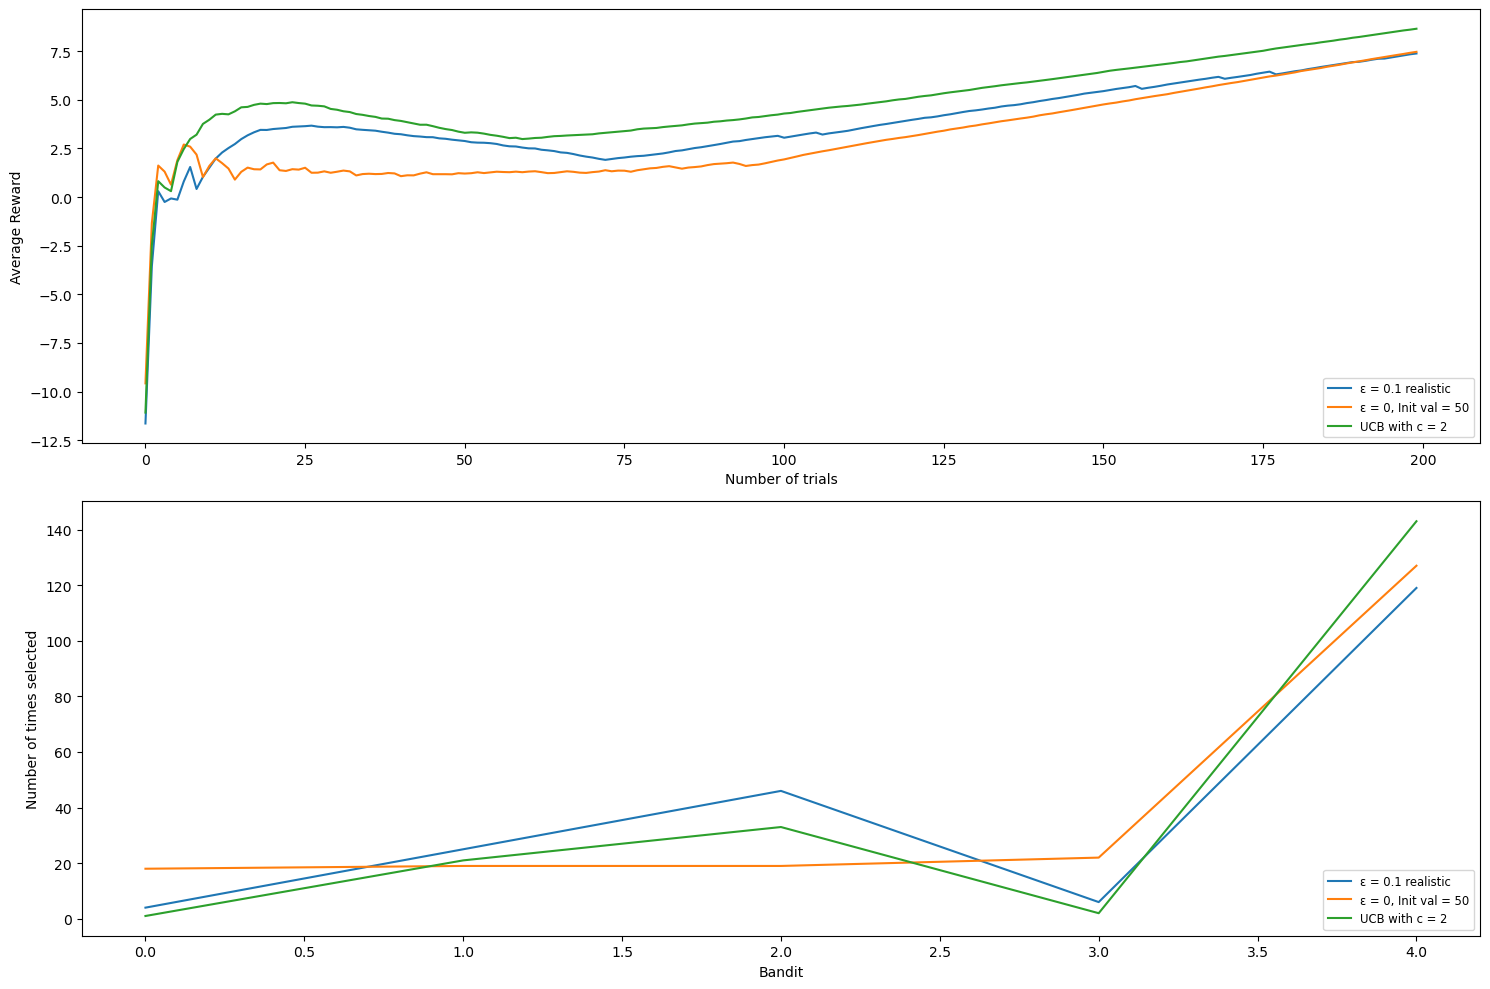

In [83]:
# create an env3 environment
Env3 = BanditEnv_3()
Env3.reset()

#Non stationary environment => Calculate the new means after each action => (1-alpha)*mean + alpha*reward
def MovingMean(alpha, action, reward, means):
    means[action] = (1-alpha)*means[action] + alpha*reward
    return means[action]

alpha = 0.1

# solve the environment (for 200 steps)
iterations = 200
Banditcount = 5

# epsilon greedy vs optimistic initial value vs UCB
# epsilon greedy
print('Epsilon Greedy')
Env3.reset()
epsilon = 0.1

Bandits = np.zeros(Banditcount)
means = np.zeros(Banditcount)
rewards = []
meanRewards = []
totalReward = 0

fig, ax = plt.subplots(nrows=2, figsize=(15, 10))
ax1, ax2 = ax.flatten()

# Play the first 5 actions to set the initial estimated means
for action in range(Banditcount):
    reward = Env3.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    means[action] = reward
    Bandits[action] = Bandits[action] + 1
    totalReward = totalReward + reward
# Play the rest of the actions
for _ in range(iterations-Banditcount):
    if np.random.random() < epsilon:
        action = np.random.randint(Banditcount)
    else:
        action = np.argmax(means)
    reward = Env3.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    MovingMean(alpha, action, reward, means)
    totalReward = totalReward + reward
print('Epsilon = ', epsilon, 'total reward = ', totalReward)

# Add to plot
ax1.plot(meanRewards)
ax2.plot(Bandits)
print('---------------------------------------------------------------')

# Optimistic initial value
# Hidden means are [-10,6,8,0,-2]
print('Optimistic Initial Value')
Env3.reset()
OptimisticInitialValue = 50
means = [OptimisticInitialValue for i in range(Banditcount)]

Bandits = np.ones(Banditcount)
rewards = []
meanRewards = []
totalReward = 0

print('True means = ', Env3.means)
print('Optimistic Initail Values = ', means)

for _ in range(iterations):
    action = np.argmax(means)
    reward = Env3.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    MovingMean(alpha, action, reward, means)
    totalReward = totalReward + reward

# Add to plot
ax1.plot(meanRewards)
ax2.plot(Bandits)

print('total reward = ', totalReward)
print('Bandits played = ', Bandits)
print('Estimated means = ', means)
error = np.abs(np.array(Env3.means) - np.array(means))
total_error = np.sum(error)

print('Total Absolute Error = ', total_error)
print('Mean Absolute Error = ', total_error / len(error))
print('Mean Squared Error = ', np.sum(error**2) / len(error))
print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))

print('---------------------------------------------------------------')

# Upper Confidence Bound
print('Upper Confidence Bound')
Env3.reset()
print('True means = ', Env3.means)
print('Confidence c = 2')
c = 2

Bandits = np.zeros(Banditcount)
means = [0 for i in range(Banditcount)]
rewards = []
meanRewards = []
totalReward = 0

# Play the first 5 actions to set the initial estimated means otherwise we will divide by zero (bandit count)
for action in range(Banditcount):
    reward = Env3.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    means[action] = reward
    Bandits[action] = Bandits[action] + 1
    totalReward = totalReward + reward

for _ in range(iterations-Banditcount):
    action = np.argmax(means+c*np.sqrt(np.log(np.sum(Bandits))/Bandits))
    reward = Env3.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    MovingMean(alpha, action, reward, means)
    totalReward = totalReward + reward
totalRewards.append(totalReward)

# Add to plot
ax1.plot(meanRewards)
ax2.plot(Bandits)

print('total reward = ', totalReward)
print('Bandits = ', Bandits)
print('Estimated means = ', means)
error = np.abs(np.array(Env3.means) - np.array(means))
total_error = np.sum(error)

print('Total Absolute Error = ', total_error)
print('Mean Absolute Error = ', total_error / len(error))
print('Mean Squared Error = ', np.sum(error**2) / len(error))
print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
print('---------------------------------------------------------------')


# Plot modifications
ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(['\u03B5 = 0.1 realistic','\u03B5 = 0, Init val = 50', 'UCB with c = 2'], loc='lower right', fontsize='small')
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Number of times selected')
ax2.legend(['\u03B5 = 0.1 realistic','\u03B5 = 0, Init val = 50', 'UCB with c = 2'], loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()

From the environment we can see that the 5th bandit is the fastest growing bandit and gives the highest reward in the end. All three methods picked up on this.
The UCB method follows the changes the best and therefore gives the highest total reward. The epsilon greedy method is following a little slower but with the low epsilon value of 0.1 it is still able to get a high total reward. The optimistic initial value method is following the slowest and therefore gives the lowest total reward. Again the main takeaway is that too much exploration will result in a lower total reward.

## 3. Server latencies

You have to make 1000 webpage requests. There are 25 servers with different latencies to choose from. 
Your task is to come up with a clever strategy to reduce the cumulative latency of these 1000 webpage requests.
The file 'latencies.csv' contains these 1000 different request. 
It's important to know that in a practical situation you would not have access to this data and requests will be made sequentially.
Use a multi-armed bandit to find the best strategy to minimize the total latency over these 1000 requests. Again, it's not allowed to process and statistically analyse the data in advance.

1. Try and optimize different types of bandits: epsilon-greedy, optimistic initial value, upper confidence bound. 
2. Compare these bandits in terms of total cumulated reward (or regret). Make a graph to visualize this.
3. Make graphs showing how often each bandit was chosen.


EXTRA: program a bayesian badit to solve the latency problem.

In [99]:
requests = pd.read_csv('latencies.csv')
requests.head()

,Server_1,Server_2,Server_3,Server_4,Server_5,Server_6,Server_7,Server_8,Server_9,Server_10,...,Server_16,Server_17,Server_18,Server_19,Server_20,Server_21,Server_22,Server_23,Server_24,Server_25
0,333,1327,132,70,456,121,102,102,84,451,...,476,135,305,206,571,111,128,966,1682,2263
1,276,1084,89,23,409,34,103,115,168,430,...,481,140,307,355,701,227,65,533,410,2639
2,266,1078,86,27,837,33,102,149,117,734,...,475,132,312,137,1211,102,69,1132,229,2237
3,331,1342,88,24,531,35,102,105,655,635,...,479,134,325,378,633,126,181,1459,262,2238
4,290,1192,143,26,434,32,102,42156,109,659,...,488,132,600,131,719,102,90,2738,229,2250


Number of requests =  1000
Number of servers =  25
Initial latencies =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Initial server counts =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Request =  0
Latencies =  [333.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
server counts =  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Request =  1
Latencies =  [333.0, 1084.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
server counts =  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Request =  2
Latencies =  [333.0, 1084.0, 86.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
server counts =  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Request =  3
Latencies =  [333.0, 1084.0, 86.0, 24.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
server counts =  [1, 1, 

C:\Users\Richard\AppData\Local\Temp\ipykernel_4948\3430422756.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  reward = requests.iloc[i][action]
C:\Users\Richard\AppData\Local\Temp\ipykernel_4948\3430422756.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  reward = requests.iloc[i][action]


OIV Latencies =  [80.19999999999999, 52.5, 34.15384615384616, 24.209558823529395, 51.5, 44.30000000000001, 26.700000000000006, 27.000000000000007, 28.454545454545453, 125.4, 72.0, 458.0, 30.833333333333336, 26.181818181818183, 91.0, 103.0, 29.363636363636374, 49.2, 232.5, 166.5, 26.571428571428577, 26.150000000000002, 154.66666666666666, 105.0, 743.0]
OIV server counts =  [5, 2, 13, 272, 4, 10, 10, 11, 11, 5, 3, 2, 6, 11, 4, 4, 11, 5, 2, 4, 14, 20, 3, 4, 2]
Request =  438
Epsilon =  0.011972515182562033
EGR Latencies =  [333.0, 1106.0, 249.6, 42.709944751381244, 404.6666666666667, 329.25, 102.0, 112.0, 182.25, 393.6666666666667, 516.75, 6245.5, 227.25, 122.0, 420.0, 483.0, 128.5, 327.0, 289.75, 562.0, 108.0, 174.35714285714286, 1954.0, 321.3333333333333, 2323.3333333333335]
EGR server counts =  [1, 2, 5, 362, 3, 4, 2, 1, 4, 3, 4, 2, 4, 1, 1, 4, 2, 2, 4, 3, 2, 14, 3, 3, 3]
LCB Latencies =  [333.0, 1084.0, 86.0, 39.52406417112301, 434.0, 102.43589743589743, 102.0, 112.0, 82.0, 398.0, 517

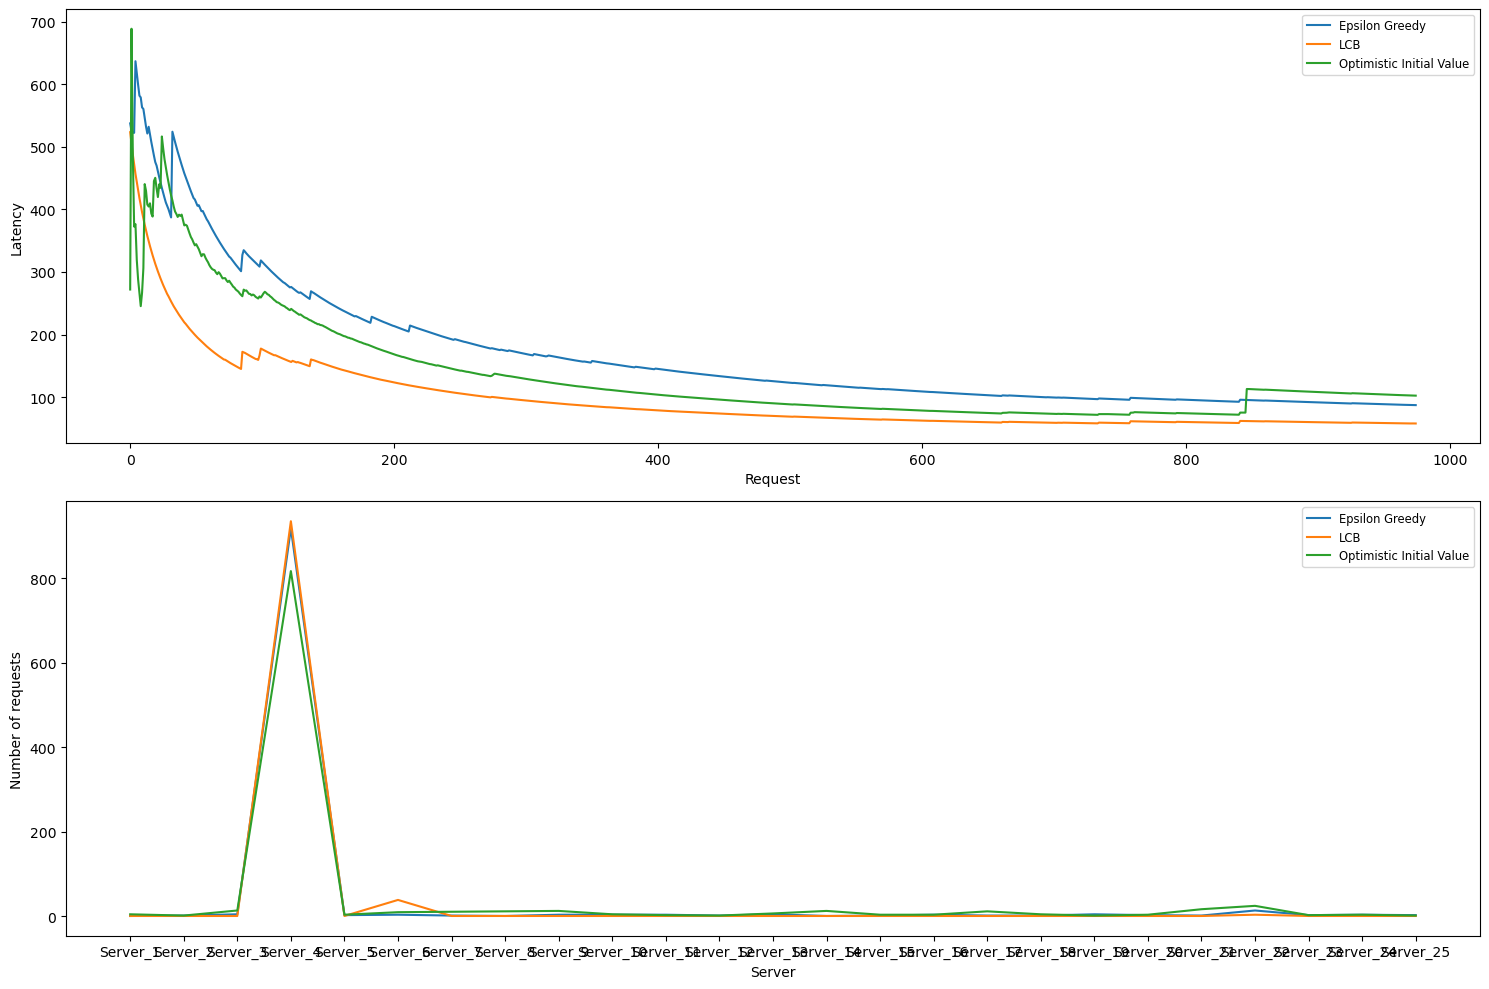

In [111]:
import copy

# Server latencies
requestcount = requests.shape[0]
print('Number of requests = ', requestcount)
servercount = requests.shape[1]
print('Number of servers = ', servercount)
# Since we want to minimize the reward and find the server with the lowest latency we will use the argmin function.
# accessing an element in a dataframe is done with the iloc function. First we select the row and then the column in square brackets.
def epsilongreedy(epsilon, decay, latencies, servers):
    if np.random.random() < epsilon:
        action = np.random.randint(servercount)
        epsilon = epsilon * decay
    else:
        action = np.argmin(latencies)
    reward = requests.iloc[i][action]
    servers[action] = servers[action] + 1
    latencies[action] = latencies[action] + ((reward - latencies[action]) / servers[action])
    return epsilon, latencies, servers, reward

def lcb(confidence, latencies, servers): # Lower Confidence Bound
    action = np.argmin(latencies-confidence*np.sqrt(np.log(np.sum(servers))/servers))
    reward = requests.iloc[i][action]
    servers[action] = servers[action] + 1
    latencies[action] = latencies[action] + ((reward - latencies[action]) / servers[action])
    return latencies, servers, reward



# Variable intialization
latencies = [0 for i in range(servercount)] # => all latencies are 0 at the beginning (Optimistic Initial Value?)
print('Initial latencies = ', latencies)
servers = [0 for i in range(servercount)] # => all servers are tested 0 times at the beginning (Bandit count)
print('Initial server counts = ', servers)
rewards = []
totalreward = 0

# Play the first 25 actions to set the initial estimated latencies
for i in range(servercount):
    print('Request = ', i)
    _, latencies, servers, reward = epsilongreedy(0, 1, latencies, servers) # => epsilon = 0 => Greedy, but first all servers will be populated
    print('Latencies = ', latencies)
    print('server counts = ', servers)
    totalreward = totalreward + reward
    rewards.append(reward)
print('Intermediate latencies = ', latencies)
print('Intermediate server counts = ', servers)
print('Intermediate reward = ', totalreward)

# Set method parameters
epsilon = 1
decay = 0.9
confidence = 1
initialvalue = -1000

# Make deep copies of the latencies and servers
egr_latencies = copy.deepcopy(latencies)
egr_servers = copy.deepcopy(servers)
egr_rewards = copy.deepcopy(rewards)
egr_totalreward = totalreward
egr_meanrewards = []

lcb_latencies = copy.deepcopy(latencies)
lcb_servers = copy.deepcopy(servers)
lcb_rewards = copy.deepcopy(rewards)
lcb_totalreward = totalreward
lcb_meanrewards = []

oiv_latencies = [initialvalue for i in range(servercount)]
oiv_servers = [1 for i in range(servercount)]
oiv_rewards = []
oiv_totalreward = 0
oiv_meanrewards = []

for i in range(servercount, requestcount):
    print('Request = ', i)
    # epsilon greedy
    epsilon, egr_latencies, egr_servers, egr_reward = epsilongreedy(epsilon, decay, egr_latencies, egr_servers)
    egr_totalreward = egr_totalreward + egr_reward
    egr_rewards.append(egr_reward)
    egr_meanrewards.append(np.mean(egr_rewards))
    print('Epsilon = ', epsilon)
    print('EGR Latencies = ', egr_latencies)
    print('EGR server counts = ', egr_servers)
    
    # lower confidence bound
    lcb_latencies, lcb_servers, lcb_reward = lcb(confidence, lcb_latencies, lcb_servers)
    lcb_totalreward = lcb_totalreward + lcb_reward
    lcb_rewards.append(lcb_reward)
    lcb_meanrewards.append(np.mean(lcb_rewards))
    print('LCB Latencies = ', lcb_latencies)
    print('LCB server counts = ', lcb_servers)
    
    # Optimistic initial value
    _, oiv_latencies, oiv_servers, oiv_reward = epsilongreedy(0, 1, oiv_latencies, oiv_servers) # => epsilon = 0 => Greedy
    oiv_totalreward = oiv_totalreward + oiv_reward
    oiv_rewards.append(oiv_reward)
    oiv_meanrewards.append(np.mean(oiv_rewards))
    print('OIV Latencies = ', oiv_latencies)
    print('OIV server counts = ', oiv_servers)
# Print the final results
print('------------- Latencies -------------')
print('Final Epsilon Greedy Latencies = ', egr_latencies)
print('Final LCB Latencies = ', lcb_latencies)
print('Final Optimistic Initial Value Latencies = ', oiv_latencies)
print('------------- Server counts -------------')
print('Final Epsilon Greedy server counts = ', egr_servers)
print('Final LCB server counts = ', lcb_servers)
print('Final Optimistic Initial Value server counts = ', oiv_servers)
print('------------- Rewards -------------')
print('Final Epsilon Greedy reward = ', egr_totalreward)
print('Final LCB reward = ', lcb_totalreward)
print('Final Optimistic Initial Value reward = ', oiv_totalreward)

# plot the results
fig, ax = plt.subplots(nrows=2, figsize=(15, 10))
ax1, ax2 = ax.flatten()
ax1.plot(egr_meanrewards, label='Epsilon Greedy')
ax1.plot(lcb_meanrewards, label='LCB')
ax1.plot(oiv_meanrewards, label='Optimistic Initial Value')
ax1.set_xlabel('Request')
ax1.set_ylabel('Latency')
ax1.legend(loc='upper right', fontsize='small')
ax2.plot(egr_servers, label='Epsilon Greedy')
ax2.plot(lcb_servers, label='LCB')
ax2.plot(oiv_servers, label='Optimistic Initial Value')
ax2.set_xlabel('Server')
ax2.set_xticks(range(servercount))
ax2.set_xticklabels(requests.columns)
ax2.set_ylabel('Number of requests')
ax2.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()
